GOLD PRICE PREDICTION

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

Data Collection and Processing

In [ ]:
gold_data=pd.read_csv('gld_price_data.csv')

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
correlation = gold_data.drop('Date', axis=1).corr()

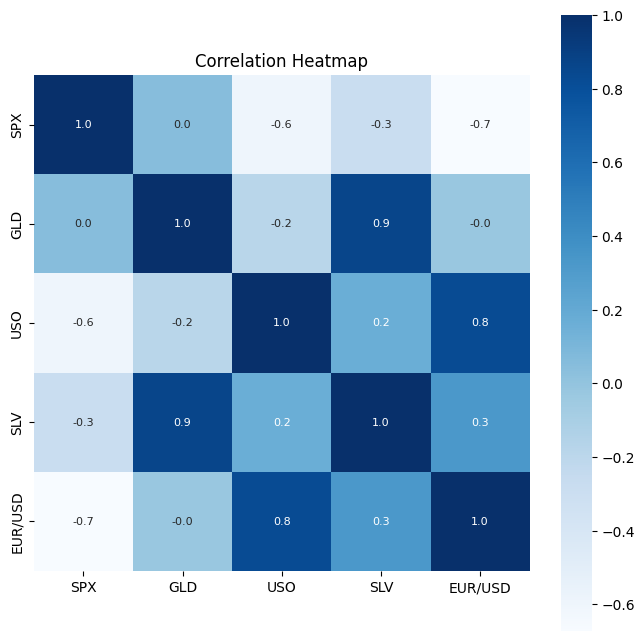

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#coorelation values of gld
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-1130600815.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

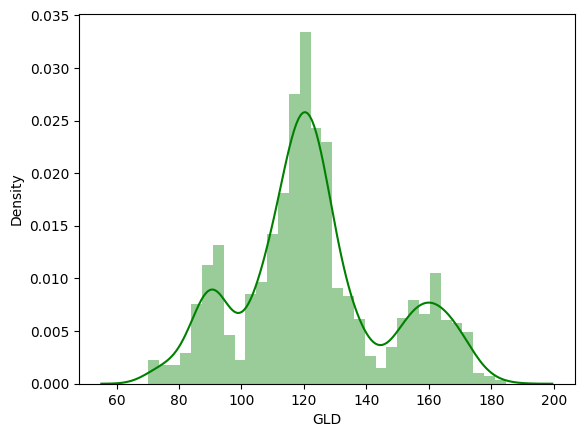

In [ ]:
#checking distribution of gold price
sns.distplot(gold_data['GLD'],color='green')

Splitting the feature and target

In [ ]:
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

In [ ]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training data and Test Data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

Model Train

In [ ]:
regressor=RandomForestRegressor(n_estimators=100)

In [ ]:
#train the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

model evaluation

In [ ]:
#predicton on test data
test_data_prediction=regressor.predict(x_test)

In [ ]:
print(test_data_prediction)

[168.66639981  82.10039985 115.9548007  127.65030088 120.66320134
 154.77839781 150.14119929 126.20430032 117.46159869 125.99290091
 116.64210106 171.99590089 141.76159813 167.47429794 115.17410027
 118.10050051 138.03690339 170.13110069 159.30070277 159.29269993
 155.22910028 125.19820012 176.26509973 157.10860232 125.1992006
  93.75619969  77.53800023 120.59150029 119.1055995  167.37399982
  88.24860018 125.29180006  91.27600058 117.63320009 121.12509915
 136.33890051 115.53800117 115.33350133 148.60919979 107.1684013
 104.15200228  87.15379793 126.43410077 118.19439976 153.42339876
 119.64479999 108.50760022 107.95299805  93.19350061 126.92069862
  74.88810055 113.67299915 121.15980009 111.33429902 118.83529868
 120.41079927 159.12829979 167.76870117 146.78279741  85.90789864
  94.31670049  86.62449888  90.48480062 118.96230057 126.36950016
 127.68590012 169.81400016 122.30549962 117.25619865  98.73990027
 168.08710136 142.91939827 132.01880291 121.12060218 120.61579955
 119.7175004

In [ ]:
#r squared error
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.9891391526177054


In [ ]:
y_test=list(y_test)

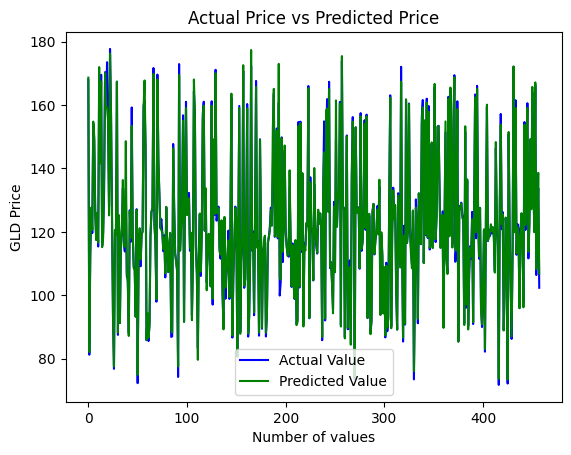

In [ ]:
plt.plot(y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [ ]:
median_price = gold_data["GLD"].median()
gold_data["Price_Class"] = gold_data["GLD"].apply(lambda x: 1 if x >= median_price else 0)

Xc = gold_data.drop(["GLD", "Price_Class", "Date"], axis=1)
yc = gold_data["Price_Class"]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)

logistic Regression

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(Xc_train, yc_train)


LogisticRegression(max_iter=1000)

In [ ]:
pred_lr = log_reg.predict(Xc_test)
print(pred_lr)


[1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1
 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0
 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1
 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1
 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0
 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0
 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0
 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1
 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0
 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0
 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1
 1 1 0 1 0 1 1 0 0 0 1 0 0 1]


In [ ]:
acc_lr = accuracy_score(yc_test, pred_lr)
print("Logistic Regression Accuracy:", acc_lr)
print(confusion_matrix(yc_test, pred_lr))
print(classification_report(yc_test, pred_lr))

Logistic Regression Accuracy: 0.925764192139738
[[221  18]
 [ 16 203]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       239
           1       0.92      0.93      0.92       219

    accuracy                           0.93       458
   macro avg       0.93      0.93      0.93       458
weighted avg       0.93      0.93      0.93       458



Decision Tree

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(Xc_train, yc_train)



DecisionTreeClassifier()

In [ ]:
pred_dtc = dtc.predict(Xc_test)

In [ ]:
acc_dtc = accuracy_score(yc_test, pred_dtc)
print("Decision Tree Classifier Accuracy:", acc_dtc)
print(confusion_matrix(yc_test, pred_dtc))
print(classification_report(yc_test, pred_dtc))

Decision Tree Classifier Accuracy: 0.9694323144104804
[[237   2]
 [ 12 207]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       239
           1       0.99      0.95      0.97       219

    accuracy                           0.97       458
   macro avg       0.97      0.97      0.97       458
weighted avg       0.97      0.97      0.97       458



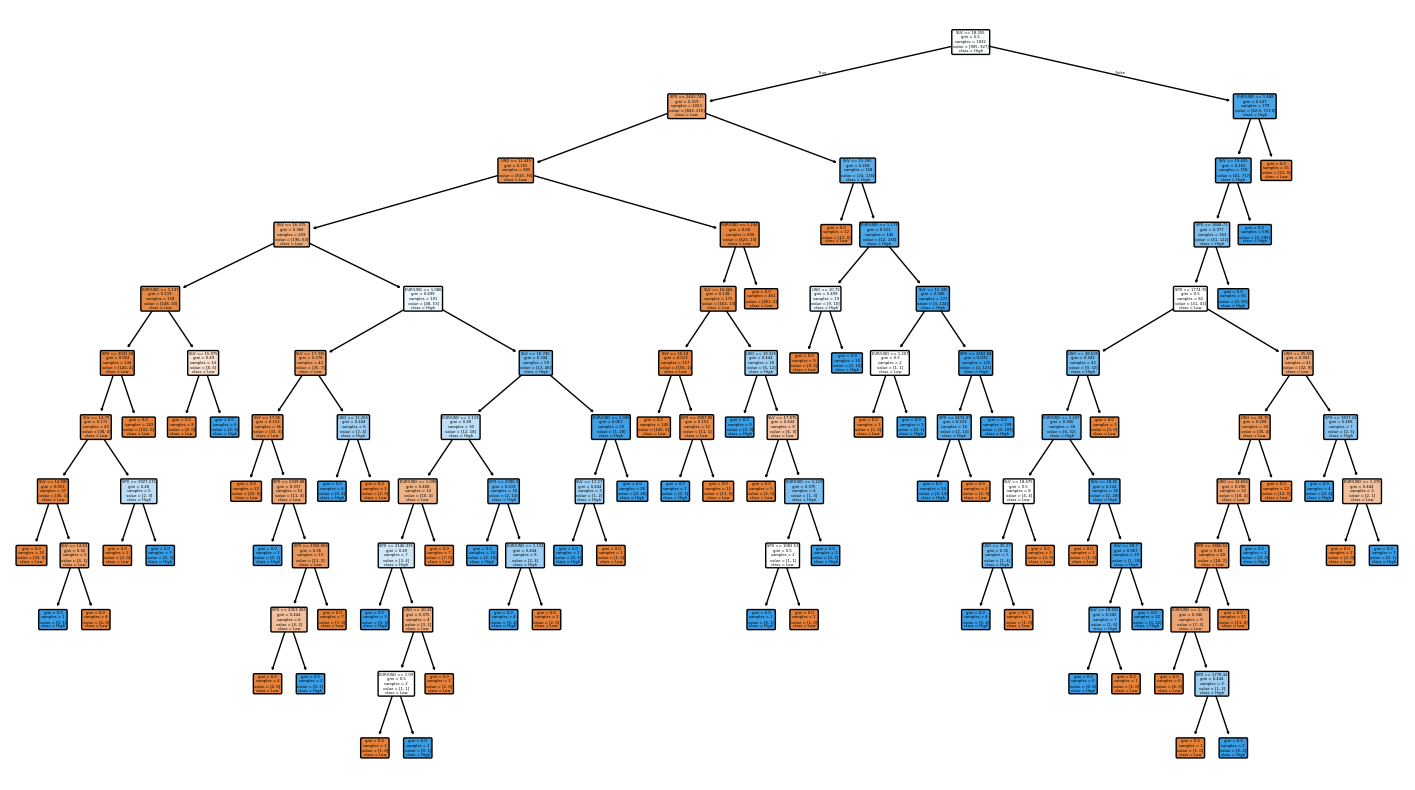

In [ ]:
from sklearn import tree
plt.figure(figsize=(18,10))
tree.plot_tree(dtc,
               filled=True,
               feature_names=Xc.columns,
               class_names=["Low","High"],
               rounded=True)
plt.show()

XG BOOST

In [ ]:
xgbc = XGBClassifier()
xgbc.fit(Xc_train, yc_train)




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
pred_xgbc = xgbc.predict(Xc_test)

In [ ]:
acc_xgbc = accuracy_score(yc_test, pred_xgbc)
print("XGBoost Classifier Accuracy:", acc_xgbc)
print(confusion_matrix(yc_test, pred_xgbc))
print(classification_report(yc_test, pred_xgbc))

XGBoost Classifier Accuracy: 0.9716157205240175
[[235   4]
 [  9 210]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       239
           1       0.98      0.96      0.97       219

    accuracy                           0.97       458
   macro avg       0.97      0.97      0.97       458
weighted avg       0.97      0.97      0.97       458



<BarContainer object of 3 artists>

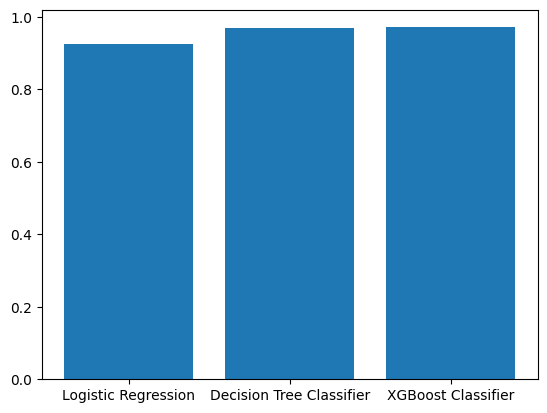

In [ ]:
#plt graph of accuracy
models = ['Logistic Regression', 'Decision Tree Classifier', 'XGBoost Classifier']
accuracies = [acc_lr, acc_dtc, acc_xgbc]

plt.bar(models, accuracies)
